<a href="https://colab.research.google.com/github/dongjun-kor/Python/blob/main/LSTM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [654]:
from google.colab import drive
drive.mount("/content/drive")
filename="/LM.m.csv"
import pandas as pd
coindesk=pd.read_csv("/content/drive/MyDrive/LSTMdata2.csv")
coindesk

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,N
0,2000-09-21,1
1,2001-04-24,1
2,2001-06-29,1
3,2001-08-20,2
4,2001-12-14,1
...,...,...
1163,2021-11-01,1
1164,2021-11-15,1
1165,2021-11-19,1
1166,2021-11-22,1


In [655]:


#비트코인 가격 데이터 읽기


#윈도우 단위로 자르는 함수
#def seq2dataset(seq,window, horizon):
#    X=[]; Y=[]
#    for i in range(len(seq)-(window+horizon)+1):
#        x= seq[i:i+window]
#        y= seq[i+window+horizon-1]
#        X.append(x); Y.append(y)
#    return np.array(X), np.array(Y)

#w=120
#h=12

#X,Y= seq2dataset(seq,w,h)

In [656]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [657]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#훈련 집합과 테스트 집합으로 분할
#split = int(len(X)*0.7)
#x_train= X[0:split]; y_train = Y[0:split]
#x_test= X[split:]; y_test = Y[split:]

In [658]:
#LSTM 모델 설계와 학습
#model=Sequential()
#model.add(LSTM(units=50, activation='relu', input_shape=x_train[0].shape))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam', metrics=['mae'])
#hist=model.fit(x_train,y_train, epochs=89, batch_size=1, validation_data=(x_test,y_test), verbose=1)

In [659]:
#LSTM 모델 평가
#ev=model.evaluate(x_test,y_test, verbose=0)
#print("손실 함수", ev[0], "MAE:",ev[1])

In [660]:
#LSTM 모델로 예측 수행
#pred=model.predict(x_test)
#print("평균 절댓값 백분율 오차(MAPE)", sum(abs(y_test-pred)/y_test)/len(x_test))



In [661]:
#학습 곡선
#plt.plot(hist.history['mae'])
#plt.plot(hist.history['val_mae'])
#plt.title('Model mae')
#plt.ylabel('mae')
#plt.xlabel('Epoch')
#plt.ylim([0, 300])
#plt.legend(['Train', 'Validation'],loc='best')
#plt.grid()
#plt.show()



In [662]:
#예측 결과 시각화
#x_range = range(len(y_test))
#plt.plot(x_range, y_test[x_range], color='red')
#plt.plot(x_range, pred[x_range], color='blue')
#plt.legend(['True prices', 'Predicted prices'], loc='best')
#plt.grid()
#plt.show()



In [663]:
#plt.plot(x_range, y_test[x_range], color='red')

In [664]:
#plt.plot(x_range, y_test[x_range], color='blue')

In [665]:
#일부 구간을 확대하여 시각화
#x_range = range(0,21)
#plt.plot(x_range, y_test[x_range], color='red')
#plt.plot(x_range, y_test[x_range], color='blue')
#plt.legend(['True prices', 'Predicted prices'], loc='best')
##plt.grid()
#plt.show()

여기는 다른거야

In [666]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [667]:
df=pd.read_csv("/content/drive/MyDrive/LSTMipc1.csv",parse_dates =["date"], index_col ="date", engine='python',encoding='euc-kr', dtype={'N':'float'})
df

,N
date,
2021-01-10,9.0
2021-02-10,8.0
2021-03-10,10.0
2021-04-10,10.0
2021-05-10,5.0
...,...
2000-08-10,4.0
2000-09-10,2.0
2000-10-10,2.0


In [668]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2021-01-10 to 2000-12-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       260 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


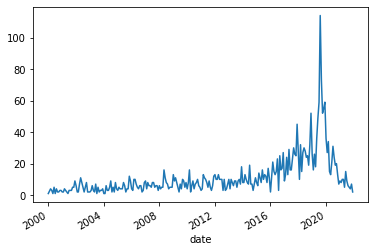

In [669]:
df['N'].plot()

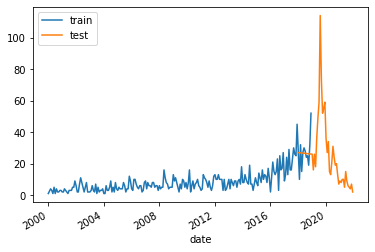

In [670]:
split_date = pd.Timestamp('2018-01-10')


train = df.loc[split_date:, ['N']]
test = df.loc[:split_date, ['N']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

In [704]:
train_sc_df = pd.DataFrame(train_sc, columns=['N'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['N'], index=test.index)
train_sc_df.head()

,N
date,
2018-01-10,0.509804
2018-02-10,0.176471
2018-03-10,0.607843
2018-04-10,0.274510
2018-05-10,0.509804


In [691]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['N'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['N'].shift(s)

train_sc_df.head(13)

,N,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
2018-01-10,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-10,10.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-10,32.0,10.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-10,15.0,32.0,10.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10,27.0,15.0,32.0,10.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-10,30.0,27.0,15.0,32.0,10.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-10,28.0,30.0,27.0,15.0,32.0,10.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-10,24.0,28.0,30.0,27.0,15.0,32.0,10.0,27.0,NaN,NaN,NaN,NaN,NaN
2018-09-10,25.0,24.0,28.0,30.0,27.0,15.0,32.0,10.0,27.0,NaN,NaN,NaN,NaN


In [692]:
X_train = train_sc_df.dropna().drop('N', axis=1)
y_train = train_sc_df.dropna()[['N']]

X_test = test_sc_df.dropna().drop('N', axis=1)
y_test = test_sc_df.dropna()[['N']]



X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,
2017-01-10,52.0,32.0,19.0,25.0,24.0,28.0,30.0,27.0,15.0,32.0,10.0,27.0
2017-02-10,9.0,52.0,32.0,19.0,25.0,24.0,28.0,30.0,27.0,15.0,32.0,10.0
2017-03-10,13.0,9.0,52.0,32.0,19.0,25.0,24.0,28.0,30.0,27.0,15.0,32.0
2017-04-10,24.0,13.0,9.0,52.0,32.0,19.0,25.0,24.0,28.0,30.0,27.0,15.0
2017-05-10,13.0,24.0,13.0,9.0,52.0,32.0,19.0,25.0,24.0,28.0,30.0,27.0


In [693]:
print(type(X_train))
X_train = X_train.values
print(type(X_train))
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
#print(X_train)
print(y_train.shape)
#print(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(212, 12)
(212, 1)


In [ ]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

In [695]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(50, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mae', optimizer='adam',metrics= 'accuracy') 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [702]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

h=model.fit(X_train_t, y_train, epochs=100,
          batch_size=50, verbose=1, callbacks=[early_stop])

Epoch 1/1000
5/5 [==============================] - 0s 10ms/step - loss: 2.8121 - accuracy: 0.0330
Epoch 2/1000
5/5 [==============================] - 0s 10ms/step - loss: 2.8668 - accuracy: 0.0330
Epoch 3/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.8349 - accuracy: 0.0330
Epoch 4/1000
5/5 [==============================] - 0s 8ms/step - loss: 2.8207 - accuracy: 0.0330
Epoch 5/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.8255 - accuracy: 0.0330
Epoch 6/1000
5/5 [==============================] - 0s 9ms/step - loss: 2.8098 - accuracy: 0.0330
Epoch 7/1000
5/5 [==============================] - 0s 9ms/step - loss: 2.8042 - accuracy: 0.0330
Epoch 8/1000
5/5 [==============================] - 0s 10ms/step - loss: 2.8018 - accuracy: 0.0330
Epoch 9/1000
5/5 [==============================] - 0s 9ms/step - loss: 2.7905 - accuracy: 0.0330
Epoch 10/1000
5/5 [==============================] - 0s 10ms/step - loss: 2.7968 - accuracy: 0.0330
Epoch 11/1000
5

In [703]:
score=model.evaluate(X_test_t,y_test,batch_size=50)
print(score)

1/1 [==============================] - 0s 29ms/step - loss: 22.4778 - accuracy: 0.0000e+00
[22.47783660888672, 0.0]


In [680]:
print(X_test)

[[-0.83333333  0.         -0.5        -0.33333333 -0.16666667  0.33333333
   1.33333333 -0.33333333  0.5         0.5         0.16666667  0.33333333]
 [ 4.83333333 -0.83333333  0.         -0.5        -0.33333333 -0.16666667
   0.33333333  1.33333333 -0.33333333  0.5         0.5         0.16666667]
 [ 3.33333333  4.83333333 -0.83333333  0.         -0.5        -0.33333333
  -0.16666667  0.33333333  1.33333333 -0.33333333  0.5         0.5       ]
 [ 4.5         3.33333333  4.83333333 -0.83333333  0.         -0.5
  -0.33333333 -0.16666667  0.33333333  1.33333333 -0.33333333  0.5       ]
 [ 1.33333333  4.5         3.33333333  4.83333333 -0.83333333  0.
  -0.5        -0.33333333 -0.16666667  0.33333333  1.33333333 -0.33333333]
 [ 1.          1.33333333  4.5         3.33333333  4.83333333 -0.83333333
   0.         -0.5        -0.33333333 -0.16666667  0.33333333  1.33333333]
 [ 2.33333333  1.          1.33333333  4.5         3.33333333  4.83333333
  -0.83333333  0.         -0.5        -0.333333

In [681]:
train_sc_df.describe()

,N,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,224.000000,223.000000,222.000000,221.000000,220.000000,219.000000,218.000000,217.000000,216.000000,215.000000,214.000000,213.000000,212.000000
mean,0.317708,0.322123,0.326577,0.331825,0.337121,0.340944,0.347095,0.350230,0.356481,0.361240,0.365265,0.371674,0.371855
std,1.280387,1.281558,1.282723,1.283244,1.283747,1.285433,1.285157,1.287292,1.286977,1.288074,1.289738,1.289356,1.292405
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.500000,0.500000,0.500000,0.541667,0.583333,0.625000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
max,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000


In [682]:
test_sc_df.describe()

,N,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,37.000000,36.000000,35.000000,34.000000,33.000000,32.000000,31.000000,30.000000,29.000000,28.000000,27.000000,26.000000,25.000000
mean,3.157658,3.152778,2.995238,2.848039,2.707071,2.447917,1.951613,1.727778,1.545977,1.428571,1.413580,1.346154,1.340000
std,3.909064,3.964400,3.906272,3.865231,3.835378,3.591217,2.276366,1.937472,1.691421,1.597599,1.626024,1.619275,1.652355
min,-0.833333,-0.833333,-0.833333,-0.833333,-0.833333,-0.833333,-0.833333,-0.833333,-0.833333,-0.833333,-0.833333,-0.833333,-0.833333
25%,0.333333,0.333333,0.333333,0.333333,0.333333,0.291667,0.250000,0.208333,0.166667,0.125000,0.083333,0.041667,0.000000
50%,2.000000,1.916667,1.833333,1.666667,1.500000,1.416667,1.333333,1.333333,1.333333,1.166667,1.000000,1.000000,1.000000
75%,4.500000,4.583333,4.250000,3.833333,3.333333,3.208333,3.166667,3.083333,2.833333,2.458333,2.583333,2.291667,2.333333
max,17.833333,17.833333,17.833333,17.833333,17.833333,17.833333,8.666667,7.000000,4.833333,4.833333,4.833333,4.833333,4.833333


Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

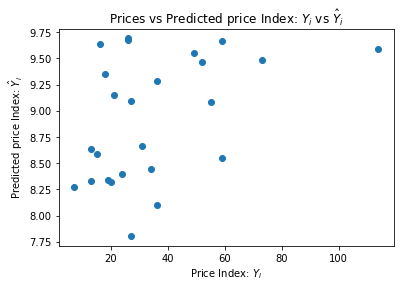

In [698]:
%matplotlib inline
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_t, batch_size=50)
plt.scatter(y_test, y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

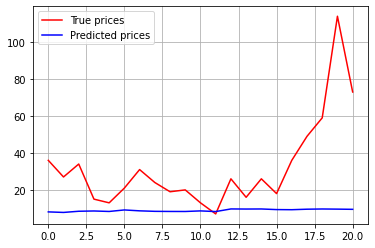

In [699]:
x_range = range(0,21)
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, y_pred[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()

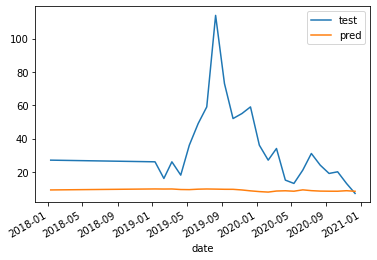

In [700]:
t_df=test_sc_df.dropna()
y_test_df=pd.DataFrame(y_test, columns=['N'], index=t_df.index)
y_pred_df=pd.DataFrame(y_pred, columns=['N'], index=t_df.index)

ax1=y_test_df.plot()
y_pred_df.plot(ax=ax1)
plt.legend(['test','pred'])

In [686]:
nFuture = 10
nStep = 100

if len(df['N']) > 100:

    lastData = np.copy(df[-150:])  # 원 데이터의 마지막 100개만 그려본다

else:

    lastData = np.copy(df)

    

dx = np.copy(lastData)

estimate = [dx[-1]]

for i in range(nFuture):

    # 마지막 nStep 만큼 입력데이로 다음 값을 예측한다

    px = dx[-nStep:].reshape(1, nStep, 1)

    

    # 다음 값을 예측한다.

    yHat = model.predict(px)[0][0]

        

    # 예측값을 저장해 둔다

    estimate.append(yHat)

    

    # 이전 예측값을 포함하여 또 다음 값을 예측하기위해 예측한 값을 저장해 둔다

    dx = np.insert(dx, len(dx), yHat)


ValueError: ignored

In [ ]:
plt.plot(ax1, lastData, 'b-o', color='blue', markersize=3, label='Time series', linewidth=1)

In [ ]:
# Loss history를 그린다

plt.figure(figsize=(8, 4))

plt.plot(h.history['loss'], color='red')

plt.title("Loss History")

plt.xlabel("epoch")

plt.ylabel("loss")

plt.show()



# 원 시계열과 예측된 시계열을 그린다

ax1 = np.arange(1, len(lastData) + 1)

ax2 = np.arange(len(lastData), len(lastData) + len(estimate))

plt.figure(figsize=(8, 4))

plt.plot(ax1, lastData, 'b-o', color='blue', markersize=3, label='Time series', linewidth=1)

plt.plot(ax2, estimate, 'b-o', color='red', markersize=3, label='Estimate')

plt.axvline(x=ax1[-1],  linestyle='dashed', linewidth=1)

plt.legend()

plt.show()